In [18]:
# lib = r'C:\Users\KerenYlab\Desktop\Technion studies\courses\Cancer Bioinformatics - 066529\Final project\submission_CB\Code'
lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\CB_FProject'
import sys
sys.path.append(lib)
# from utilities.package_importing import *
import scipy.stats as stats
import os
from os.path import join
import pickle
# lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
# import sys
# sys.path.append(lib)
# from utilities.package_importing import *
# import scipy.stats as stats
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [19]:
FOLDER = r'C:\Users\KerenYlab\Desktop\Technion studies\courses\Cancer Bioinformatics - 066529\Final project\submission_CB\Results\All Experiments outputs\exp_57'

PKL_FILE = join(FOLDER, f'Enhanced_XGboost_Model.pkl')
# from MachineLearning.smartseq_env.Models.enhanced_xgboost import Enhanced_XGboost
model = pickle.load(open(PKL_FILE, "rb"))
# Enhanced_XGboost(num_round=1, early_stopping_rounds=3, k_folds=1)

In [3]:
from Models.feature_explorer import Feature_Explorer

explorer = Feature_Explorer(model, 5)


In [7]:
# explorer.k_importance_genes(test_dataset.gene_names)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
CSV_FILE = r'C:\Users\KerenYlab\Desktop\Technion studies\courses\Cancer Bioinformatics - 066529\Final project\submission_CB\Results\All Experiments outputs\exp_78\k_importance_features_78.csv'
pd.read_csv(CSV_FILE)

,GAPDH,CST7,PSME2,CCR7,AHNAK,PRF1,PRDM1,WHSC1L1,TGOLN2,SPTAN1,APOBEC3C,TBC1D10C,GZMH,TSPAN31,BBIP1,XAF1,USP20,CIRBP,VPS37A,SDHD
0,87.958774,81.807076,62.145623,52.392806,45.393232,39.911927,36.181291,35.484077,33.260258,32.435326,31.90139,31.889444,31.094536,31.044312,30.535889,29.655786,28.903137,28.220406,25.770233,25.712982


# Part 2: 

In [20]:
FOLDER = r'C:\Users\KerenYlab\Desktop\Technion studies\courses\Cancer Bioinformatics - 066529\Final project\submission_CB\Results\All Experiments outputs\exp_57'

PKL_FILE = join(FOLDER, f'Enhanced_XGboost_Model.pkl')

five_fold_model = pickle.load(open(PKL_FILE, "rb"))


In [21]:
model = five_fold_model.model_layers[0][0]

In [22]:
model.feature_names = whole_rna_seq_dataset.gene_names

<AxesSubplot:>

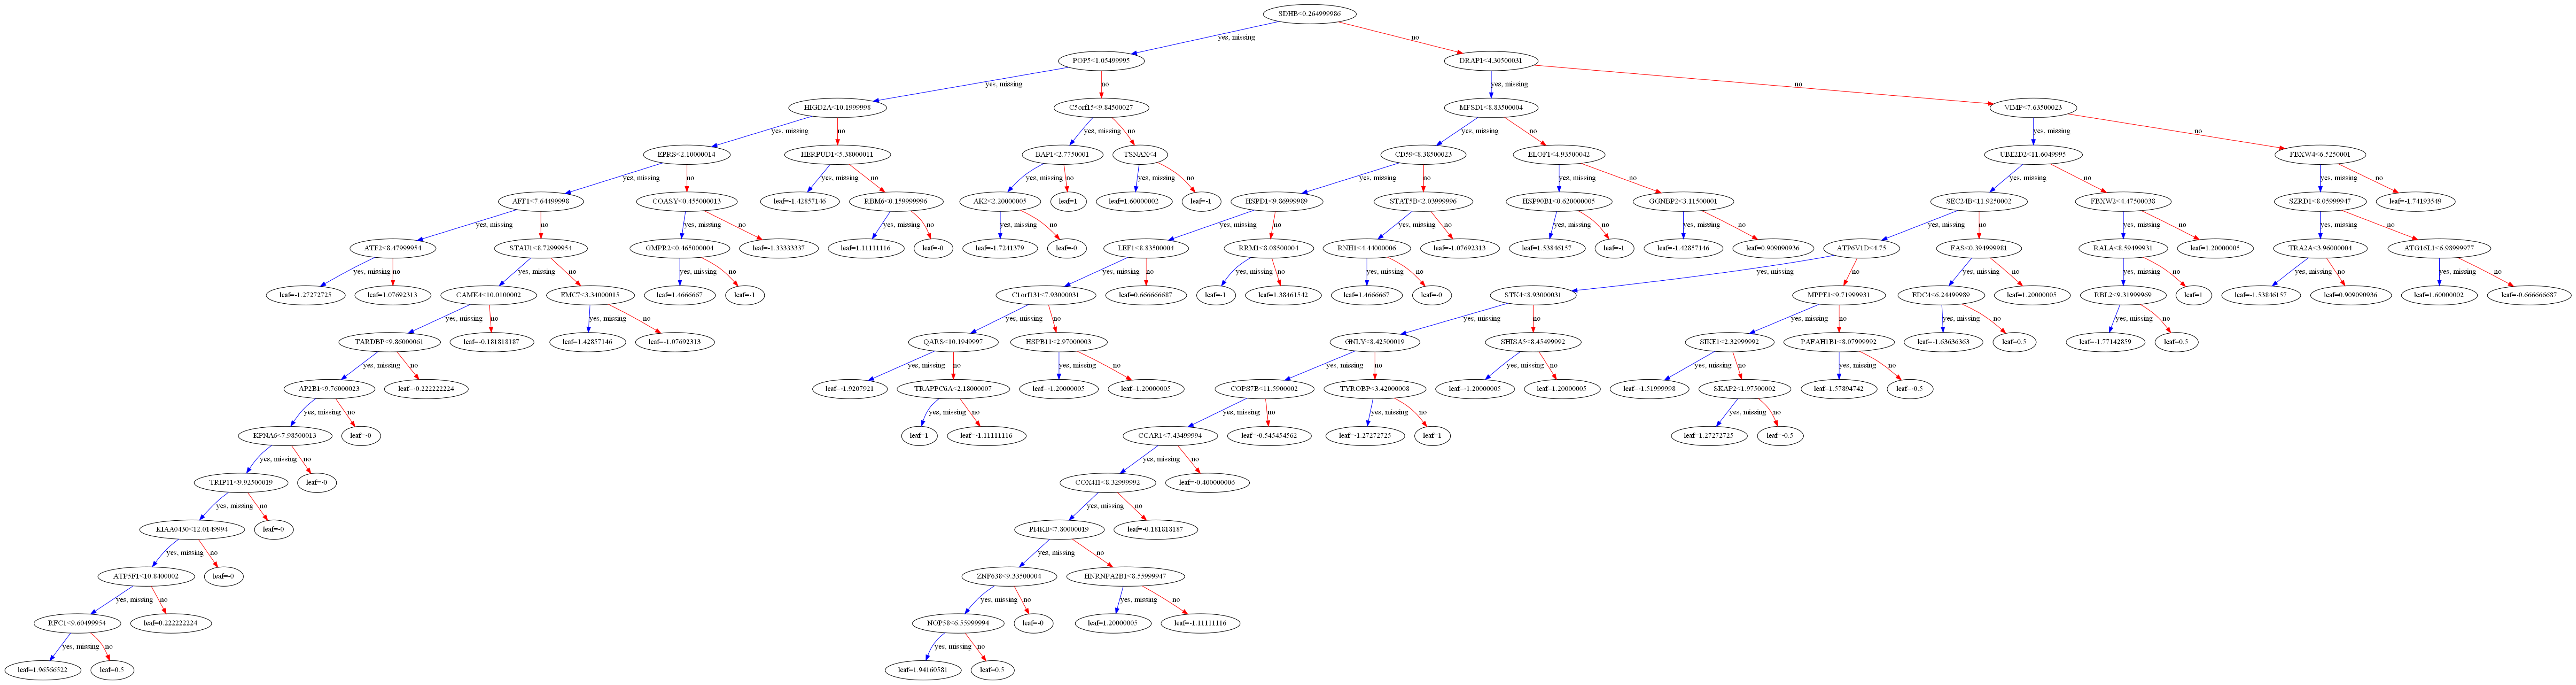

In [24]:
fig, ax = plt.subplots(figsize=(120, 60))

plot_tree(model, ax=ax, num_tree=1)

In [96]:
fig.savefig(r'C:\Users\KerenYlab\Desktop\garb\tree.jpg')

In [45]:
# dict.fromkeys(model.model_layers[0][0].feature_names, 0)
# model.model_layers[0][0].feature_names
xgb = model.model_layers[0][0]

In [48]:
xgb.trees_to_dataframe()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,f1368,0.265,0-1,0-2,0-1,79.654495,256.000000
1,0,1,0-1,f3073,1.055,0-3,0-4,0-3,23.691620,102.000000
2,0,2,0-2,f3407,4.305,0-5,0-6,0-5,40.952331,154.000000
3,0,3,0-3,f2450,10.200,0-7,0-8,0-7,16.542419,86.250000
4,0,4,0-4,f1216,9.845,0-9,0-10,0-9,23.668699,15.750000
...,...,...,...,...,...,...,...,...,...,...
591,9,14,9-14,Leaf,NaN,NaN,NaN,NaN,-0.416246,2.332955
592,9,15,9-15,Leaf,NaN,NaN,NaN,NaN,0.313906,1.027590
593,9,16,9-16,Leaf,NaN,NaN,NaN,NaN,-0.053203,1.046524
594,9,17,9-17,Leaf,NaN,NaN,NaN,NaN,0.540350,3.187407


In [11]:
for layer in model.model_layers:
    print(layer)

(<xgboost.core.Booster object at 0x000001A9DA1BA340>, 0.93992776, 0.21052631578947367)
(<xgboost.core.Booster object at 0x000001A9DA1D06A0>, 0.12874952, 0.9166666666666666)
(<xgboost.core.Booster object at 0x000001A9DA1D06D0>, 0.9962043, 0.007751937984496124)
(<xgboost.core.Booster object at 0x000001A9DD91C460>, 0.9915467, 0.08888888888888889)
(<xgboost.core.Booster object at 0x000001A9DD91C4F0>, 1.9984074, 1)


In [50]:
from Models.feature_explorer import Feature_Explorer

# explorer = Feature_Explorer(model, 5)
explorer.features_importance

[]

In [4]:
data_path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\smart_seq\SmartSeq_RNAseq_DATA.p'
cells, gene_names, patients_information = pickle.load(open(data_path, "rb"))


In [5]:
from utilities.smart_seq_dataset import RNAseq_Dataset
whole_rna_seq_dataset = RNAseq_Dataset(cells, patients_information, gene_names)

In [6]:
whole_rna_seq_dataset.filter_genes_by_variance(6)

Dataset was cleared from genes with variance of less than 6


In [9]:
len(whole_rna_seq_dataset.gene_names)
whole_rna_seq_dataset

In [10]:
output_path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\XGBoost_facilities\data'
save_path = join(output_path, r'smartseq_data_4k_genes.p')
pickle.dump((whole_rna_seq_dataset.cells, whole_rna_seq_dataset.gene_names, patients_information), open(save_path, 'wb'), protocol=4)


In [12]:
fff = pickle.load(open(save_path, "rb"))

In [17]:
len(fff[2])#.shape

16291

In [107]:
data_split_path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\smart_seq\patients_divisions\all_test0.3_ver1.p'
train_patients_names = pickle.load(open(data_split_path, "rb"))

In [108]:
train_dataset, test_dataset = whole_rna_seq_dataset.split_by_patient_names(train_patients_names)


In [109]:
train_dataset